# Series de tiempo sinusoidales con python
Estoy desaroolando varios experimentos sobre series temporales usando python, estos experimentos buscan aclarar los conceptos más sencillos y entender como aplicarlos a otras series más complejas.

x(t)=Acos(2πft+ϕ)

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [42]:
from statsmodels.tsa.stattools import acf, pacf

A continuación construyo una serie sinusoidal de 5Hz con un retaso de fase de pi/4 radianes.

In [28]:
A = .8
f = 5
t = np.arange(0,1,.01)
phi = np.pi/4
x = A*np.cos(2*np.pi*f*t + phi)

In [29]:
x

array([ 0.56568542,  0.3631924 ,  0.12514757, -0.12514757, -0.3631924 ,
       -0.56568542, -0.71280522, -0.79015067, -0.79015067, -0.71280522,
       -0.56568542, -0.3631924 , -0.12514757,  0.12514757,  0.3631924 ,
        0.56568542,  0.71280522,  0.79015067,  0.79015067,  0.71280522,
        0.56568542,  0.3631924 ,  0.12514757, -0.12514757, -0.3631924 ,
       -0.56568542, -0.71280522, -0.79015067, -0.79015067, -0.71280522,
       -0.56568542, -0.3631924 , -0.12514757,  0.12514757,  0.3631924 ,
        0.56568542,  0.71280522,  0.79015067,  0.79015067,  0.71280522,
        0.56568542,  0.3631924 ,  0.12514757, -0.12514757, -0.3631924 ,
       -0.56568542, -0.71280522, -0.79015067, -0.79015067, -0.71280522,
       -0.56568542, -0.3631924 , -0.12514757,  0.12514757,  0.3631924 ,
        0.56568542,  0.71280522,  0.79015067,  0.79015067,  0.71280522,
        0.56568542,  0.3631924 ,  0.12514757, -0.12514757, -0.3631924 ,
       -0.56568542, -0.71280522, -0.79015067, -0.79015067, -0.71

In [9]:
len(x)

100

In [10]:
len(t)

100

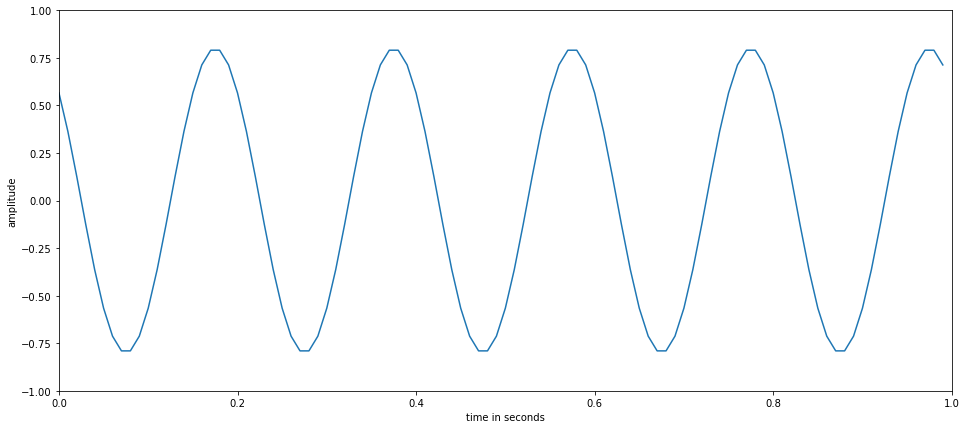

In [5]:
plt.figure(figsize=(16,7))
plt.plot(t,x)
plt.axis([0,1,-1,1])
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.show()

Esta es una serie de tiempo sinusoidal con todas las características de una serie. a continuación voy a aplicar conceptos de forecasting sobre esta misma serie para entender un poco mejor el concepto.
Primero voy a crear un serie sinusoidal más parecida a la que estoy usando.

In [31]:
series = pd.Series(x)

In [33]:
series.head()

0    0.565685
1    0.363192
2    0.125148
3   -0.125148
4   -0.363192
dtype: float64

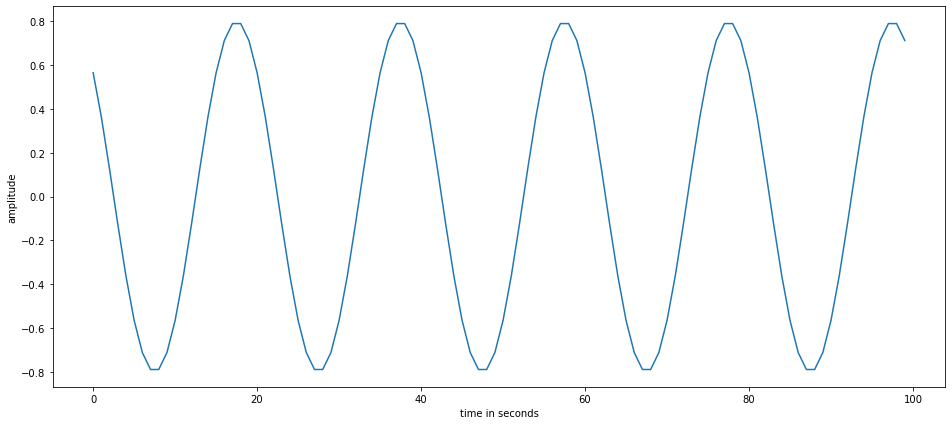

In [34]:
plt.figure(figsize=(16,7))
plt.plot(series.index, series.values)
# plt.axis([0,290,-1,1])
plt.xlabel('time in seconds')
plt.ylabel('amplitude')
plt.show()

In [36]:
adf_result = adfuller(series)

In [37]:
print('ADF Statistics: %f'%adf_result[0])
print('p-value: %f'%adf_result[1])
print('Critical values:')
for key, value in adf_result[4].items():
    print('\t%s: %.3f'%(key, value))

ADF Statistics: -228112092744716.562500
p-value: 0.000000
Critical values:
	1%: -3.499
	5%: -2.892
	10%: -2.583


In [38]:
if adf_result[0] < adf_result[4]['5%']:
    print('Rejected H0 - Time Series is Stationary')
else:
    print('Failed to reject H0 - Time Series is Non-Stationary')

Rejected H0 - Time Series is Stationary


### ACF

In [43]:
def get_autocorrelation_function(dataset, nlags=100):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
    
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_acf = acf(dataset, nlags=nlags, fft=False)
    
    nucount=0
    for autocorr in lag_acf:
        print('Lag {0} = {1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_acf,marker='o')
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=inf_confidence, linestyle='--',color='gray')
    plt.axhline(y=sup_confidence, linestyle='--',color='gray')
    
    plt.title('Autocorrelation Function')
    plt.xlabel('number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9384557811884525
Lag 2 = 0.7869588019645235
Lag 3 = 0.5620615247799494
Lag 4 = 0.28714574943699794
Lag 5 = -0.010000000000000002
Lag 6 = -0.29998653987540214
Lag 7 = -0.5547304545757495
Lag 8 = -0.7501734873478763
Lag 9 = -0.8685515997723393
Lag 10 = -0.8999999999999999
Lag 11 = -0.8433501295589372
Lag 12 = -0.7060571025270288
Lag 13 = -0.503282999550702
Lag 14 = -0.2562440499995031
Lag 15 = 0.010000000000000106
Lag 16 = 0.2690848404379074
Lag 17 = 0.49595192934650223
Lag 18 = 0.6692717879103817
Lag 19 = 0.7734459481428239
Lag 20 = 0.8
Lag 21 = 0.7482444779294218
Lag 22 = 0.625155403089534
Lag 23 = 0.4445044743214547
Lag 24 = 0.22534235056200827
Lag 25 = -0.010000000000000238
Lag 26 = -0.23818314100041282
Lag 27 = -0.4371734041172551
Lag 28 = -0.5883700884728871
Lag 29 = -0.6783402965133087
Lag 30 = -0.7000000000000001
Lag 31 = -0.6531388262999065
Lag 32 = -0.5442537036520394
Lag 33 = -0.3857259490922073
Lag 34 = -0.194440651

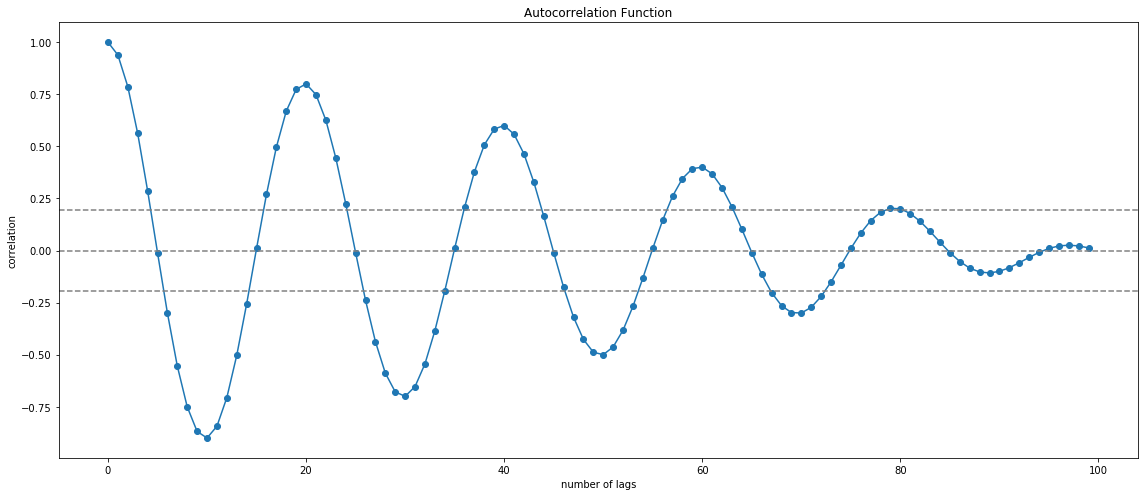

In [46]:
get_autocorrelation_function(series, 100)

### PACF

In [47]:
def get_partial_autocorrelation_function(dataset, nlags=99):
    ## Confidence intervals
    inf_confidence = -1.96/np.sqrt(len(dataset))
    sup_confidence = 1.96/np.sqrt(len(dataset))
      
    print('Invervalo de confianza superior: {0}'.format(sup_confidence))
    
    lag_pacf = pacf(dataset, nlags=nlags, method='ols')

    nucount=0
    for autocorr in lag_pacf:
        print('Lag {0} = {1}'.format(nucount, autocorr))
        nucount+=1
    
    #Plot PACF:
    plt.figure(figsize=(16, 7))
    plt.plot(lag_pacf, marker='o')
    plt.axhline(y=0,linestyle='--', color='gray')
    plt.axhline(y=inf_confidence, linestyle='--', color='gray')
    plt.axhline(y=sup_confidence, linestyle='--', color='gray')
    
    plt.title('Partial Autocorrelation Function')
    plt.xlabel('Number of lags')
    plt.ylabel('correlation')
    plt.tight_layout()

Invervalo de confianza superior: 0.196
Lag 0 = 1.0
Lag 1 = 0.9536229295591113
Lag 2 = -1.0
Lag 3 = -0.677145434292239
Lag 4 = -0.5180815635767257
Lag 5 = -0.42369387924364504
Lag 6 = -0.36046271507302874
Lag 7 = -0.3134063032962931
Lag 8 = -0.2742922596402917
Lag 9 = -0.23776412907378738
Lag 10 = -0.1999999999999999
Lag 11 = -0.15850941938252552
Lag 12 = -0.11253848571249381
Lag 13 = -0.06353919596346669
Lag 14 = -0.01500244422234808
Lag 15 = 0.028692622759061853
Lag 16 = 0.06385747042117042
Lag 17 = 0.08848080132188679
Lag 18 = 0.10219877914444864
Lag 19 = 0.10567294625501711
Lag 20 = 0.09999999999999998
Lag 21 = 0.08645968329955946
Lag 22 = 0.06656934694962899
Lag 23 = 0.042245520109903026
Lag 24 = 0.015848671060307
Lag 25 = -0.01001641656056728
Lag 26 = -0.0328913266141659
Lag 27 = -0.050848727789689144
Lag 28 = -0.06269107668364758
Lag 29 = -0.0679326083067967
Lag 30 = -0.06666666666666668
Lag 31 = -0.059441032268447144
Lag 32 = -0.0471970842835493
Lag 33 = -0.0312472007175534
Lag 

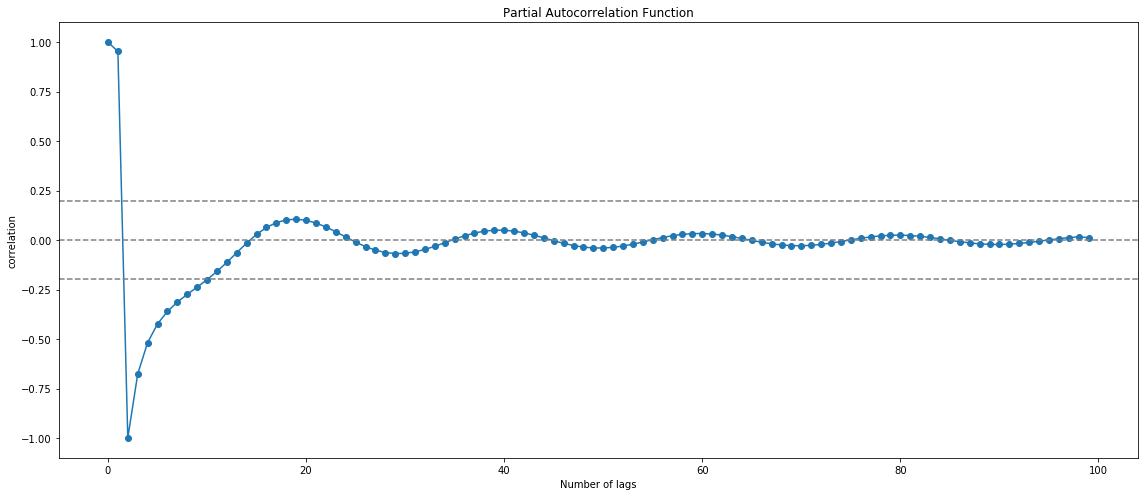

In [48]:
get_partial_autocorrelation_function(series, 99)

### ARIMA

In [50]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
p = 2
d = 2
q = 2

model = ARIMA(series, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

## Referencias
* [Making Sinusoids with Python](http://www.mrcolson.com/2015/12/24/Making-Sinusoids-with-Python.html)